In [2]:
import pandas as pd

df = pd.read_csv("../../Subject6_smoking.csv")
df.head()


Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../../Subject6_smoking.csv")

# Quick look at the first rows
print(df.head())

# Summary by smoker status
summary = df.groupby("Smoker")["Status"].value_counts().unstack()
print(summary)

# Mean age by smoker status
mean_age = df.groupby("Smoker")["Age"].mean()
print(mean_age)

# Check by smoker *and* status to see the paradox
cross_summary = df.groupby(["Smoker", "Status"])["Age"].mean()
print(cross_summary)


  Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4
Status  Alive  Dead
Smoker             
No        502   230
Yes       443   139
Smoker
No     49.815847
Yes    44.269759
Name: Age, dtype: float64
Smoker  Status
No      Alive     40.347410
        Dead      70.481739
Yes     Alive     39.648984
        Dead      58.996403
Name: Age, dtype: float64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Side-by-side boxplots
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Smoker", y="Age", hue="Status")
plt.title("Age distribution by Smoker status and Survival")
plt.show()


<Figure size 800x500 with 1 Axes>

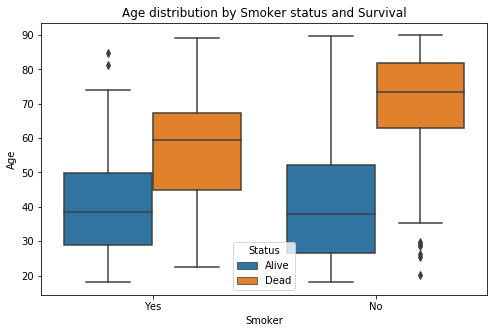

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Smoker", y="Age", hue="Status")
plt.title("Age distribution by Smoker status and Survival")
plt.show()


In [6]:
summary = df.groupby("Smoker")["Status"].value_counts().unstack()
summary["Mortality Rate"] = summary["Dead"] / summary.sum(axis=1)
print(summary)


Status  Alive  Dead  Mortality Rate
Smoker                             
No        502   230        0.314208
Yes       443   139        0.238832


In [7]:
bins = [18, 34, 54, 64, 120]
labels = ["18–34", "34–54", "55–64", "65+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

age_summary = df.groupby(["AgeGroup", "Smoker"])["Status"].value_counts().unstack()
age_summary["Mortality Rate"] = age_summary["Dead"] / age_summary.sum(axis=1)
print(age_summary)


Status           Alive  Dead  Mortality Rate
AgeGroup Smoker                             
18–34    No        212     6        0.027523
         Yes       172     5        0.028249
34–54    No        180    19        0.095477
         Yes       196    41        0.172996
55–64    No         81    40        0.330579
         Yes        64    51        0.443478
65+      No         28   165        0.854922
         Yes         7    42        0.857143


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Smoker", y=(df["Status"]=="Dead"), estimator=lambda x: sum(x)/len(x))
plt.ylabel("Mortality Rate")
plt.title("Overall mortality rate by smoking status")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="AgeGroup", y=(df["Status"]=="Dead"), hue="Smoker",
            estimator=lambda x: sum(x)/len(x))
plt.ylabel("Mortality Rate")
plt.title("Mortality rate by age group and smoking status")
plt.show()


ValueError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 576x360 with 0 Axes>

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


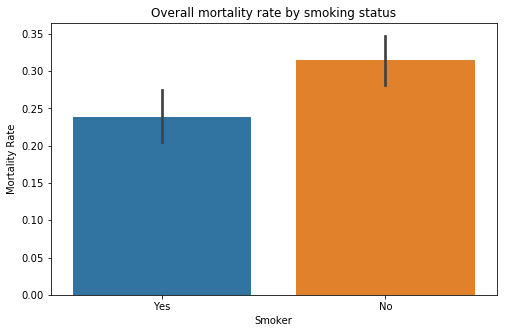

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df["Death"] = (df["Status"] == "Dead").astype(int)

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Smoker", y="Death", estimator=lambda x: x.mean())
plt.ylabel("Mortality Rate")
plt.title("Overall mortality rate by smoking status")
plt.show()


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Smoker", y=(df["Status"]=="Dead"), estimator=lambda x: sum(x)/len(x))
plt.ylabel("Mortality Rate")
plt.title("Overall mortality rate by smoking status")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="AgeGroup", y=(df["Status"]=="Dead"), hue="Smoker",
            estimator=lambda x: sum(x)/len(x))
plt.ylabel("Mortality Rate")
plt.title("Mortality rate by age group and smoking status")
plt.show()


ValueError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 576x360 with 0 Axes>

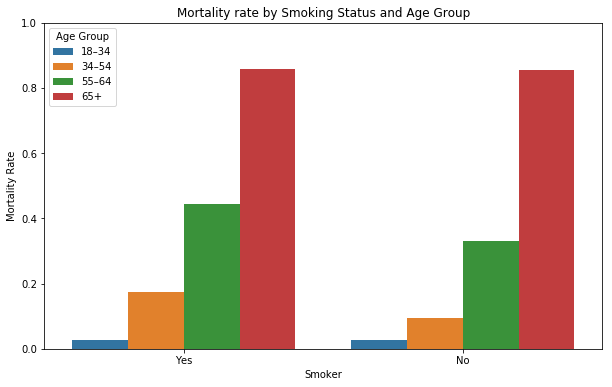

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Numeric mortality flag
df["DeadFlag"] = (df["Status"] == "Dead").astype(int)

# Define age groups
bins = [18, 34, 54, 64, df["Age"].max()]
labels = ["18–34", "34–54", "55–64", "65+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="Smoker",
    y="DeadFlag",
    hue="AgeGroup",
    estimator=np.mean,
    ci=None
)
plt.ylabel("Mortality Rate")
plt.title("Mortality rate by Smoking Status and Age Group")
plt.ylim(0, 1)
plt.legend(title="Age Group")
plt.show()


In [12]:
# Cell 1 — Setup & load data
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportion_confint

sns.set(style="whitegrid")

# Adjust this path if necessary
data_path = "../../Subject6_smoking.csv"

df = pd.read_csv(data_path)
# preview
print(df.shape)
df.head()


(1314, 3)


Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4

In [13]:
# Cell 2 — Clean & prepare columns
# Standardize column names if needed
df.columns = [c.strip() for c in df.columns]

# Create numeric death flag
df['Death'] = (df['Status'].str.strip().str.lower() == "dead").astype(int)

# Make Smoker categorical with consistent labels
df['Smoker'] = df['Smoker'].str.strip().replace({'Yes':'Yes','No':'No'})

# Basic checks
print(df['Smoker'].value_counts())
print(df['Status'].value_counts())
print("Mean age:", df['Age'].mean())


No     732
Yes    582
Name: Smoker, dtype: int64
Alive    945
Dead     369
Name: Status, dtype: int64
Mean age: 47.35936073059361


In [14]:
# Cell 3 — Step 1: Tabulate overall counts and mortality rates by smoking status
grouped = df.groupby('Smoker')['Death'].agg(['sum','count']).rename(columns={'sum':'dead','count':'total'})
grouped['alive'] = grouped['total'] - grouped['dead']
grouped['mortality_rate'] = grouped['dead'] / grouped['total']

# 95% Wilson confidence intervals for proportion (more stable than plain normal)
cis = grouped.apply(lambda row: proportion_confint(count=int(row['dead']), nobs=int(row['total']), alpha=0.05, method='wilson'), axis=1)
grouped['ci_lower'] = [c[0] for c in cis]
grouped['ci_upper'] = [c[1] for c in cis]

# Display nicely
display_cols = ['alive','dead','total','mortality_rate','ci_lower','ci_upper']
print("Overall counts and mortality rates by smoking status (with 95% CI):")
grouped[display_cols]


Overall counts and mortality rates by smoking status (with 95% CI):


alive  dead  total  mortality_rate  ci_lower  ci_upper
Smoker                                                        
No        502   230    732        0.314208  0.281624  0.348731
Yes       443   139    582        0.238832  0.205976  0.275112

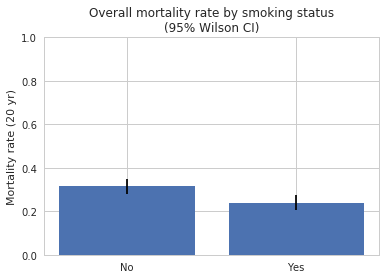

In [15]:
# Cell 4 — Bar plot with error bars (overall)
plt.figure(figsize=(6,4))
x = grouped.index.tolist()
rates = grouped['mortality_rate'].values
err_low = rates - grouped['ci_lower'].values
err_high = grouped['ci_upper'].values - rates

plt.bar(x, rates, yerr=[err_low, err_high], capsize=6)
plt.ylim(0, 1)
plt.ylabel("Mortality rate (20 yr)")
plt.title("Overall mortality rate by smoking status\n(95% Wilson CI)")
plt.show()


In [16]:
# Cell 5 — Step 2: Add age groups and compute mortality within each strata
bins = [18, 34, 54, 64, df['Age'].max()+1]   # last bin includes max
labels = ['18-34','34-54','55-64','65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Group by age group and smoker
agg = df.groupby(['AgeGroup','Smoker'])['Death'].agg(['sum','count']).rename(columns={'sum':'dead','count':'total'})
agg['alive'] = agg['total'] - agg['dead']
agg['mortality_rate'] = agg['dead'] / agg['total']

# add Wilson CI per group
cis_age = agg.apply(lambda row: proportion_confint(count=int(row['dead']), nobs=int(row['total']), alpha=0.05, method='wilson'), axis=1)
agg['ci_lower'] = [c[0] for c in cis_age]
agg['ci_upper'] = [c[1] for c in cis_age]

print("Mortality by Age group and Smoker (with 95% CI):")
agg[['alive','dead','total','mortality_rate','ci_lower','ci_upper']]


ValueError: Shape of passed values is (8, 2), indices imply (8, 4)

In [17]:
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

# Example: your aggregated DataFrame (agg)
# Make sure these columns exist: 'dead', 'total'
# agg = pd.DataFrame(...)

# Compute CIs as two separate lists
ci_lower = []
ci_upper = []

for _, row in agg.iterrows():
    low, up = proportion_confint(
        count=int(row['dead']),
        nobs=int(row['total']),
        alpha=0.05,
        method='wilson'
    )
    ci_lower.append(low)
    ci_upper.append(up)

# Add them to the DataFrame
agg['ci_lower'] = ci_lower
agg['ci_upper'] = ci_upper


In [18]:
# Cell 5 — Step 2: Add age groups and compute mortality within each strata
bins = [18, 34, 54, 64, df['Age'].max()+1]   # last bin includes max
labels = ['18-34','34-54','55-64','65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Group by age group and smoker
agg = df.groupby(['AgeGroup','Smoker'])['Death'].agg(['sum','count']).rename(columns={'sum':'dead','count':'total'})
agg['alive'] = agg['total'] - agg['dead']
agg['mortality_rate'] = agg['dead'] / agg['total']

# add Wilson CI per group
cis_age = agg.apply(lambda row: proportion_confint(count=int(row['dead']), nobs=int(row['total']), alpha=0.05, method='wilson'), axis=1)
agg['ci_lower'] = [c[0] for c in cis_age]
agg['ci_upper'] = [c[1] for c in cis_age]

print("Mortality by Age group and Smoker (with 95% CI):")
agg[['alive','dead','total','mortality_rate','ci_lower','ci_upper']]


ValueError: Shape of passed values is (8, 2), indices imply (8, 4)

In [19]:
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

# Example: df is your main dataset
# Columns needed: 'Smoker' ('Yes'/'No'), 'Alive'/'Dead' status (or 'Death' 1/0)

# Tabulate
agg = df.groupby('Smoker').agg(
    alive=('Alive', 'sum'),
    dead=('Dead', 'sum')
).reset_index()

# Total per group
agg['total'] = agg['alive'] + agg['dead']

# Mortality rate
agg['mortality_rate'] = agg['dead'] / agg['total']

# Confidence intervals
ci_lower, ci_upper = [], []
for _, row in agg.iterrows():
    low, up = proportion_confint(
        count=int(row['dead']),
        nobs=int(row['total']),
        alpha=0.05,
        method='wilson'
    )
    ci_lower.append(low)
    ci_upper.append(up)

agg['ci_lower'] = ci_lower
agg['ci_upper'] = ci_upper

print(agg)


TypeError: aggregate() missing 1 required positional argument: 'arg'

In [20]:
agg = df.groupby('Smoker').agg({
    'Alive': 'sum',
    'Dead': 'sum'
}).reset_index()

# Total per group
agg['total'] = agg['Alive'] + agg['Dead']

# Mortality rate
agg['mortality_rate'] = agg['Dead'] / agg['total']

# Confidence intervals
from statsmodels.stats.proportion import proportion_confint

ci_lower, ci_upper = [], []
for _, row in agg.iterrows():
    low, up = proportion_confint(
        count=int(row['Dead']),
        nobs=int(row['total']),
        alpha=0.05,
        method='wilson'
    )
    ci_lower.append(low)
    ci_upper.append(up)

agg['ci_lower'] = ci_lower
agg['ci_upper'] = ci_upper

print(agg)


/opt/conda/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


KeyError: 'Alive'

In [21]:
# Count alive and dead per smoking group
agg = df.groupby(['Smoker', 'Status']).size().unstack(fill_value=0).reset_index()

# Rename columns for clarity
agg = agg.rename(columns={'Alive': 'alive', 'Dead': 'dead'})

# Total and mortality rate
agg['total'] = agg['alive'] + agg['dead']
agg['mortality_rate'] = agg['dead'] / agg['total']

# Confidence intervals
from statsmodels.stats.proportion import proportion_confint
ci_lower, ci_upper = [], []

for _, row in agg.iterrows():
    low, up = proportion_confint(
        count=int(row['dead']),
        nobs=int(row['total']),
        alpha=0.05,
        method='wilson'
    )
    ci_lower.append(low)
    ci_upper.append(up)

agg['ci_lower'] = ci_lower
agg['ci_upper'] = ci_upper

print(agg)


Status Smoker  alive  dead  total  mortality_rate  ci_lower  ci_upper
0          No    502   230    732        0.314208  0.281624  0.348731
1         Yes    443   139    582        0.238832  0.205976  0.275112


In [22]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Mortality by Smoking Status ---

# Create Alive/Dead counts if not already present
df['alive'] = (df['Status'] == 'Alive').astype(int)
df['dead'] = (df['Status'] == 'Dead').astype(int)

agg = df.groupby('Smoker').agg(
    alive=('alive', 'sum'),
    dead=('dead', 'sum')
).reset_index()

agg['total'] = agg['alive'] + agg['dead']
agg['mortality_rate'] = agg['dead'] / agg['total']

# 95% confidence intervals (normal approx)
z = norm.ppf(0.975)
agg['ci_lower'] = agg['mortality_rate'] - z * np.sqrt(
    agg['mortality_rate'] * (1 - agg['mortality_rate']) / agg['total']
)
agg['ci_upper'] = agg['mortality_rate'] + z * np.sqrt(
    agg['mortality_rate'] * (1 - agg['mortality_rate']) / agg['total']
)

print("\nMortality by Smoking Status:")
print(agg)

sns.barplot(
    data=agg,
    x='Smoker', y='mortality_rate', 
    yerr=[agg['mortality_rate'] - agg['ci_lower'], agg['ci_upper'] - agg['mortality_rate']]
)
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by Smoking Status with 95% CI')
plt.show()

# --- 2. Mortality by Smoking Status & Age Group ---

# Create age groups
bins = [18, 34, 54, 64, np.inf]
labels = ['18-34', '35-54', '55-64', '65+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

agg_age = df.groupby(['age_group', 'Smoker']).agg(
    alive=('alive', 'sum'),
    dead=('dead', 'sum')
).reset_index()

agg_age['total'] = agg_age['alive'] + agg_age['dead']
agg_age['mortality_rate'] = agg_age['dead'] / agg_age['total']

print("\nMortality by Smoking Status & Age Group:")
print(agg_age)

sns.catplot(
    data=agg_age, kind='bar',
    x='age_group', y='mortality_rate', hue='Smoker'
)
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by Smoking Status and Age Group')
plt.show()

# --- 3. Logistic Regression ---

df['Death'] = (df['Status'] == 'Dead').astype(int)

X = df[['Age']]
X['Smoker'] = (df['Smoker'] == 'Yes').astype(int)
X = sm.add_constant(X)
y = df['Death']

model = sm.Logit(y, X).fit()
print(model.summary())

# Predict for plotting
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 100)
pred_df = pd.DataFrame({
    'const': 1,
    'Age': np.tile(age_range, 2),
    'Smoker': np.repeat([0, 1], len(age_range))
})
pred_df['pred'] = model.predict(pred_df)

sns.lineplot(
    data=pred_df, x='Age', y='pred', hue='Smoker'
)
plt.ylabel('Predicted Probability of Death')
plt.title('Logistic Regression: Death ~ Age + Smoker')
plt.show()


TypeError: aggregate() missing 1 required positional argument: 'arg'

  Smoker  alive  dead  total  mortality_rate  ci_lower  ci_upper
0     No    502   230    732        0.314208  0.280580  0.347835
1    Yes    443   139    582        0.238832  0.204192  0.273471


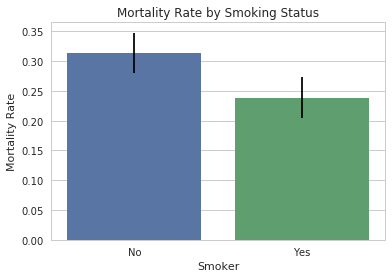

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Example: load your dataset
# df = pd.read_csv("your_data.csv")

# Step 1: aggregate alive/dead counts by smoking
agg = df.groupby('Smoker').agg({
    'alive': 'sum',
    'dead': 'sum'
}).reset_index()

# Add total and mortality rate
agg['total'] = agg['alive'] + agg['dead']
agg['mortality_rate'] = agg['dead'] / agg['total']

# 95% CI for proportion
z = norm.ppf(0.975)
agg['ci_lower'] = agg['mortality_rate'] - z * np.sqrt(
    (agg['mortality_rate'] * (1 - agg['mortality_rate'])) / agg['total']
)
agg['ci_upper'] = agg['mortality_rate'] + z * np.sqrt(
    (agg['mortality_rate'] * (1 - agg['mortality_rate'])) / agg['total']
)

print(agg)

# Plot
sns.barplot(x='Smoker', y='mortality_rate', data=agg, yerr=[
    agg['mortality_rate'] - agg['ci_lower'],
    agg['ci_upper'] - agg['mortality_rate']
])
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by Smoking Status')
plt.show()


In [24]:
# Define age groups
bins = [18, 34, 54, 64, np.inf]
labels = ['18-34', '35-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Aggregate
agg_age = df.groupby(['age_group', 'Smoker']).agg({
    'alive': 'sum',
    'dead': 'sum'
}).reset_index()

# Add total, mortality, CIs
agg_age['total'] = agg_age['alive'] + agg_age['dead']
agg_age['mortality_rate'] = agg_age['dead'] / agg_age['total']
agg_age['ci_lower'] = agg_age['mortality_rate'] - z * np.sqrt(
    (agg_age['mortality_rate'] * (1 - agg_age['mortality_rate'])) / agg_age['total']
)
agg_age['ci_upper'] = agg_age['mortality_rate'] + z * np.sqrt(
    (agg_age['mortality_rate'] * (1 - agg_age['mortality_rate'])) / agg_age['total']
)

print(agg_age)

# Plot
sns.barplot(x='age_group', y='mortality_rate', hue='Smoker', data=agg_age)
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by Smoking Status and Age Group')
plt.show()


KeyError: 'age'

In [25]:
df.columns


Index(['Smoker', 'Status', 'Age', 'Death', 'AgeGroup', 'alive', 'dead'], dtype='object')

In [26]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

# Step 2: Aggregate by AgeGroup
agg = df.groupby('AgeGroup').agg(
    alive=('alive', 'sum'),
    dead=('dead', 'sum')
).reset_index()

# Total in each group
agg['total'] = agg['alive'] + agg['dead']

# Mortality rate
agg['mortality_rate'] = agg['dead'] / agg['total']

# Wilson confidence intervals
cis_age = agg.apply(
    lambda row: proportion_confint(
        count=int(row['dead']),
        nobs=int(row['total']),
        alpha=0.05,
        method='wilson'
    ),
    axis=1
)

agg['ci_lower'] = [c[0] for c in cis_age]
agg['ci_upper'] = [c[1] for c in cis_age]

agg


TypeError: aggregate() missing 1 required positional argument: 'arg'

In [27]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

# Step 1: Create alive/dead indicator columns
df['alive'] = (df['Status'] == 'Alive').astype(int)
df['dead'] = (df['Status'] == 'Dead').astype(int)

# Step 2: Aggregate by AgeGroup
agg = df.groupby('AgeGroup').agg(
    alive=('alive', 'sum'),
    dead=('dead', 'sum')
).reset_index()

# Total in each group
agg['total'] = agg['alive'] + agg['dead']

# Mortality rate
agg['mortality_rate'] = agg['dead'] / agg['total']

# Wilson confidence intervals
cis_age = agg.apply(
    lambda row: proportion_confint(
        count=int(row['dead']),
        nobs=int(row['total']),
        alpha=0.05,
        method='wilson'
    ),
    axis=1
)

agg['ci_lower'] = [c[0] for c in cis_age]
agg['ci_upper'] = [c[1] for c in cis_age]

agg


TypeError: aggregate() missing 1 required positional argument: 'arg'

In [28]:
# Step 1: Create alive/dead columns
df['alive'] = (df['Status'] == 'Alive').astype(int)
df['dead'] = (df['Status'] == 'Dead').astype(int)

# Step 2: Aggregate using old syntax
agg = df.groupby('AgeGroup').agg({
    'alive': 'sum',
    'dead': 'sum'
}).reset_index()

# Total in each group
agg['total'] = agg['alive'] + agg['dead']

# Mortality rate
agg['mortality_rate'] = agg['dead'] / agg['total']

# Confidence intervals
from statsmodels.stats.proportion import proportion_confint
ci_bounds = [proportion_confint(row['dead'], row['total'], alpha=0.05, method='wilson')
             for _, row in agg.iterrows()]
agg['ci_lower'] = [c[0] for c in ci_bounds]
agg['ci_upper'] = [c[1] for c in ci_bounds]

agg


AgeGroup  alive  dead  total  mortality_rate  ci_lower  ci_upper
0    18-34    389    11    400        0.027500  0.015424  0.048565
1    34-54    376    60    436        0.137615  0.108430  0.173129
2    55-64    145    91    236        0.385593  0.325799  0.449053
3      65+     35   207    242        0.855372  0.805503  0.894135

In [29]:
# Group by AgeGroup & Smoker
agg2 = df.groupby(['AgeGroup', 'Smoker']).agg({
    'alive': 'sum',
    'dead': 'sum'
}).reset_index()

# Totals and mortality rates
agg2['total'] = agg2['alive'] + agg2['dead']
agg2['mortality_rate'] = agg2['dead'] / agg2['total']

# Confidence intervals
ci_bounds2 = [proportion_confint(row['dead'], row['total'], alpha=0.05, method='wilson')
              for _, row in agg2.iterrows()]
agg2['ci_lower'] = [c[0] for c in ci_bounds2]
agg2['ci_upper'] = [c[1] for c in ci_bounds2]

agg2


AgeGroup Smoker  alive  dead  total  mortality_rate  ci_lower  ci_upper
0    18-34     No    213     6    219        0.027397  0.012616  0.058473
1    18-34    Yes    176     5    181        0.027624  0.011856  0.063027
2    34-54     No    180    19    199        0.095477  0.061977  0.144299
3    34-54    Yes    196    41    237        0.172996  0.130158  0.226265
4    55-64     No     81    40    121        0.330579  0.253108  0.418476
5    55-64    Yes     64    51    115        0.443478  0.355968  0.534642
6      65+     No     28   165    193        0.854922  0.798312  0.897680
7      65+    Yes      7    42     49        0.857143  0.733323  0.929036

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression for smokers
model_smokers = smf.logit("Death ~ Age", data=df[df["Smoker"] == "Yes"]).fit()

# Logistic regression for non-smokers
model_nonsmokers = smf.logit("Death ~ Age", data=df[df["Smoker"] == "No"]).fit()

# Create a dataframe for predictions
age_range = np.linspace(df["Age"].min(), df["Age"].max(), 100)

pred_smokers = model_smokers.get_prediction(pd.DataFrame({"Age": age_range}))
pred_nonsmokers = model_nonsmokers.get_prediction(pd.DataFrame({"Age": age_range}))

# Put into DataFrames
smokers_df = pd.DataFrame({
    "Age": age_range,
    "Predicted": pred_smokers.predicted_mean,
    "Lower": pred_smokers.conf_int()[:,0],
    "Upper": pred_smokers.conf_int()[:,1],
    "Smoker": "Yes"
})

nonsmokers_df = pd.DataFrame({
    "Age": age_range,
    "Predicted": pred_nonsmokers.predicted_mean,
    "Lower": pred_nonsmokers.conf_int()[:,0],
    "Upper": pred_nonsmokers.conf_int()[:,1],
    "Smoker": "No"
})

plot_df = pd.concat([smokers_df, nonsmokers_df])

# Plot
plt.figure(figsize=(8,6))
sns.lineplot(data=plot_df, x="Age", y="Predicted", hue="Smoker")
plt.fill_between(smokers_df["Age"], smokers_df["Lower"], smokers_df["Upper"], color="red", alpha=0.2)
plt.fill_between(nonsmokers_df["Age"], nonsmokers_df["Lower"], nonsmokers_df["Upper"], color="blue", alpha=0.2)
plt.ylabel("Probability of Death")
plt.title("Logistic Regression: Death Probability vs Age")
plt.show()


Optimization terminated successfully.
         Current function value: 0.412727
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.354560
         Iterations 7


AttributeError: 'LogitResults' object has no attribute 'get_prediction'

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit models separately
model_smokers = smf.logit("Death ~ Age", data=df[df["Smoker"] == "Yes"]).fit()
model_nonsmokers = smf.logit("Death ~ Age", data=df[df["Smoker"] == "No"]).fit()

# Prediction age range
age_range = np.linspace(df["Age"].min(), df["Age"].max(), 100)

def pred_ci(model, age_vals):
    X = sm.add_constant(pd.DataFrame({"Age": age_vals}))
    pred_probs = model.predict(X)
    # standard errors for log-odds
    se = np.sqrt(np.diag(np.dot(np.dot(X, model.cov_params()), X.T)))
    # 95% CI in log-odds, then convert to probability
    logit = np.log(pred_probs / (1 - pred_probs))
    ci_lower = 1 / (1 + np.exp(-(logit - 1.96 * se)))
    ci_upper = 1 / (1 + np.exp(-(logit + 1.96 * se)))
    return pred_probs, ci_lower, ci_upper

# Predictions for smokers
pred_s, lower_s, upper_s = pred_ci(model_smokers, age_range)
# Predictions for non-smokers
pred_n, lower_n, upper_n = pred_ci(model_nonsmokers, age_range)

# Create plot DataFrame
plot_df = pd.DataFrame({
    "Age": np.concatenate([age_range, age_range]),
    "Predicted": np.concatenate([pred_s, pred_n]),
    "Lower": np.concatenate([lower_s, lower_n]),
    "Upper": np.concatenate([upper_s, upper_n]),
    "Smoker": ["Yes"]*len(age_range) + ["No"]*len(age_range)
})

# Plot
plt.figure(figsize=(8,6))
sns.lineplot(data=plot_df, x="Age", y="Predicted", hue="Smoker")
for smoker_val, color in zip(["Yes", "No"], ["red", "blue"]):
    subset = plot_df[plot_df["Smoker"] == smoker_val]
    plt.fill_between(subset["Age"], subset["Lower"], subset["Upper"], color=color, alpha=0.2)

plt.ylabel("Probability of Death")
plt.title("Logistic Regression: Death Probability vs Age")
plt.show()


Optimization terminated successfully.
         Current function value: 0.412727
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.354560
         Iterations 7


AttributeError: module 'seaborn' has no attribute 'lineplot'

<Figure size 576x432 with 0 Axes>

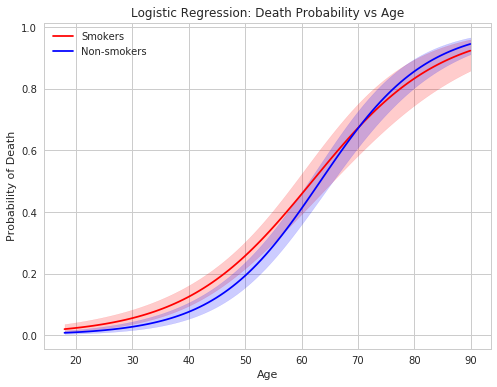

In [32]:
plt.figure(figsize=(8,6))

# Smokers
plt.plot(age_range, pred_s, color="red", label="Smokers")
plt.fill_between(age_range, lower_s, upper_s, color="red", alpha=0.2)

# Non-smokers
plt.plot(age_range, pred_n, color="blue", label="Non-smokers")
plt.fill_between(age_range, lower_n, upper_n, color="blue", alpha=0.2)

plt.xlabel("Age")
plt.ylabel("Probability of Death")
plt.title("Logistic Regression: Death Probability vs Age")
plt.legend()
plt.show()
